<a href="https://colab.research.google.com/github/A-ngelG/CE888/blob/main/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Classification

In [198]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix,f1_score,accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier


In [190]:
#Load data
df = pd.read_csv('https://raw.githubusercontent.com/A-ngelG/CE888_1/master/lab3/bank-additional-full.csv', delimiter=";")
print(df.shape)
df

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Preprocessing 
-Use LabelEncoder to convert the label into numbers.

-Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df)

-Column "duration" must be deleted

-Check if there are any missing values in the 
dataset. If there are, drop the rows.

-Plot histogram of the label and calculate the imbalance in the dataset.


In [192]:
LabelEnc = LabelEncoder()
df['y'] = LabelEnc.fit_transform(df['y'])

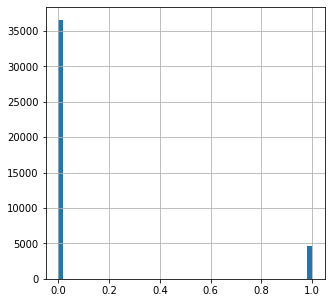

In [193]:
df_dummies = pd.get_dummies(df)
df_dummies = df_dummies.drop(["duration"], axis = 1)
df_dummies = df_dummies.dropna()
df_dummies['y'].hist(bins=50, figsize=(5,5))

### Data Modeling


In [194]:
x = df_dummies.drop(columns = ['y']).values
y = df_dummies['y'].values
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=50, stratify=df['y'])
print('len train; x ', len(x_train), 'y', len(y_train))
print('len test; x ', len(x_test), 'y', len(y_test))

len train; x  32950 y 32950
len test; x  8238 y 8238


In [200]:
dummy_clf = DummyClassifier(strategy="stratified") #most frequent would not work when using f score because it would always be 0
dummy_clf.fit(x_train,y_train)
print('Dummy F-score', f1_score(y_train,dummy_clf.predict(x_train)))
print('Dummy Accuracy score', accuracy_score(y_train,dummy_clf.predict(x_train))) #just to contrast xd

Dummy F-score 0.11131974248927039
Dummy Accuracy score 0.7989984825493172


In [203]:
clf = RandomForestClassifier(n_estimators=300 , max_depth = 6, random_state = 60)
scores = cross_val_score(clf,x_train,y_train,cv = 10, scoring=make_scorer(f1_score))

In [204]:
print('RFC F-Score', scores.mean())

RFC F-Score 0.28259494419030495
